# Prueba de evaluacion. Tratamiento de XML

In [212]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



In [133]:
%ls -l *.xml

 Volume in drive C has no label.
 Volume Serial Number is BE20-3201

 Directory of C:\Desarrollo\repos\Master-BigData-CIFF-2016\entornos-DS-python


 Directory of C:\Desarrollo\repos\Master-BigData-CIFF-2016\entornos-DS-python

02/10/2016  16:40            23.235 Unplanned Events.xml
               1 File(s)         23.235 bytes
               0 Dir(s)  95.239.340.032 bytes free


In [151]:
from lxml import objectify
parsed = objectify.parse('Unplanned Events.xml')
root = parsed.getroot()
print root.tag
print root.attrib
print root.countchildren()

{http://datex2.eu/schema/1_0/1_0}d2LogicalModel
{'modelBaseVersion': '1.0'}
2


In [223]:
situation=[]
probabilityOfOccurrence=[]
impactOnTraffic =[]
capacityRemaining=[]
numberOfLanesRestricted=[]
numberOfOperationalLanes =[]
originalNumberOfLanes = []
trafficRestrictionType = []
delayTimeValue = []
comment = []
effectOnRoadLayout = []
subjectTypeOfWorks =[]

for row in root.payloadPublication.situation:
    situation.append(row.get('id'))
    probabilityOfOccurrence.append(row.situationRecord.probabilityOfOccurrence.text)
    impactOnTraffic.append(row.situationRecord.impact.impactOnTraffic.text)
    capacityRemaining.append(float(row.situationRecord.impact.impactDetails.capacityRemaining.text))
    numberOfLanesRestricted.append(int(row.situationRecord.impact.impactDetails.numberOfLanesRestricted.text))
    numberOfOperationalLanes.append(int(row.situationRecord.impact.impactDetails.numberOfOperationalLanes.text))
    originalNumberOfLanes.append(int(row.situationRecord.impact.impactDetails.originalNumberOfLanes.text))
    trafficRestrictionType.append( row.situationRecord.impact.impactDetails.trafficRestrictionType.text)
    delayTimeValue.append(float(row.situationRecord.impact.delays.delayTimeValue.text))
    #effectOnRoadLayout.append(row.situationRecord.effectOnRoadLayout.text)
    #subjectTypeOfWorks.append(row.situationRecord.subjectTypeOfWorks.text)
    #comment.append(row.situationRecord.nonGeneralPublicComment.comment.value.text)
    
    
data = pd.DataFrame()
data['situation'] = situation
data['probabilityOfOccurrence'] = probabilityOfOccurrence
data['impactOnTraffic'] = impactOnTraffic
data['capacityRemaining'] = capacityRemaining
data['numberOfLanesRestricted'] = numberOfLanesRestricted
data['originalNumberOfLanes'] = originalNumberOfLanes
data['trafficRestrictionType'] = trafficRestrictionType
data['delayTimeValue'] = delayTimeValue
data['availableLines'] = data['originalNumberOfLanes'] - data['numberOfLanesRestricted']
#data['comment'] = comment
#data['effectOnRoadLayout'] = effectOnRoadLayout
#data['subjectTypeOfWorks'] = subjectTypeOfWorks

data.head(50)
#data['capacityRemaining'].describe()

,situation,probabilityOfOccurrence,impactOnTraffic,capacityRemaining,numberOfLanesRestricted,originalNumberOfLanes,trafficRestrictionType,delayTimeValue,availableLines
0,GUID732336731,certain,heavy,75.0,1,4,carriagewayPartiallyObstructed,600.0,3
1,GUID732889125,certain,impossible,0.0,2,2,carriagewayBlocked,900.0,0
2,GUID732957845,certain,impossible,0.0,1,1,carriagewayBlocked,600.0,0
3,GUID733038589,certain,impossible,0.0,1,1,carriagewayBlocked,0.0,0
4,GUID733038591,certain,impossible,0.0,1,1,carriagewayBlocked,0.0,0
5,GUID733043648,certain,freeFlow,33.0,2,3,carriagewayPartiallyObstructed,0.0,1


# 1.Histograms

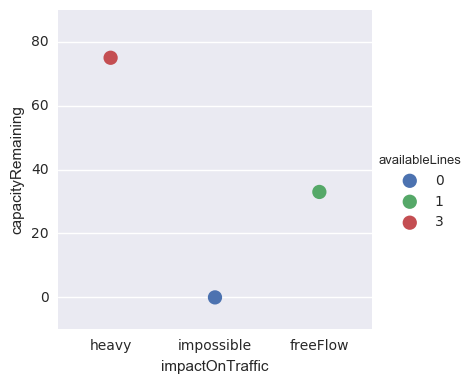

In [226]:
sns.factorplot('impactOnTraffic','capacityRemaining',hue='availableLines',data=data)

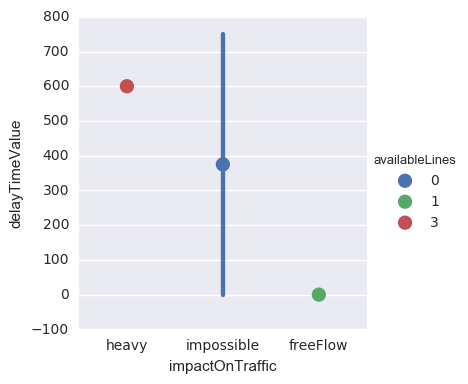

In [227]:
sns.factorplot('impactOnTraffic','delayTimeValue',hue='availableLines',data=data)